In [4]:
from pathlib import Path

import pandas as pd
import numpy as np

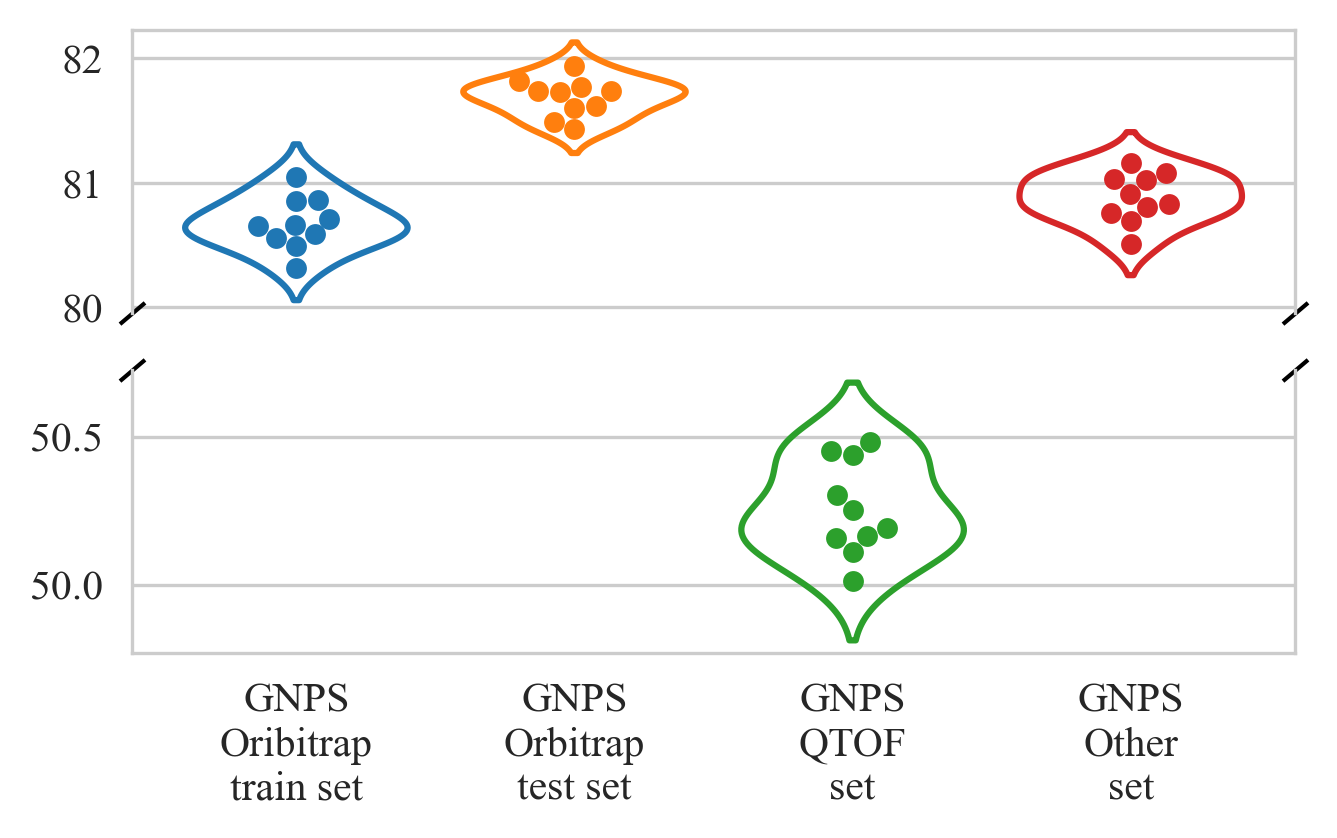

In [5]:
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

sns.set_style("whitegrid")
sns.set_palette("tab10")

fm.fontManager.addfont('/usr/share/fonts/truetype/msttcorefonts/times.ttf')
plt.rcParams['font.family'] = 'Times New Roman'

dir_ = Path("./replication_models")
labels = None
values = []

for path in dir_.glob("*"):
    df = pd.read_csv(path / "mean.tsv", sep="\t", index_col=0)
    if labels is None:
        labels = df.index
    values.append(df.values[:, 0])
values = np.array(values)
values = values.T

figure, axs = plt.subplots(2, 1, dpi=300, figsize=(5, 2.7), sharex=True)
axs: list[Axes]
colors = sns.color_palette("tab10")

sns.violinplot(y=values[0], x=0, fill=False, ax=axs[0], color=colors[0], inner=None)
sns.violinplot(y=values[1], x=1, fill=False, ax=axs[0], color=colors[1], inner=None)
sns.violinplot(y=values[2], x=2, fill=False, ax=axs[1], color=colors[2], inner=None)
sns.violinplot(y=values[3], x=3, fill=False, ax=axs[0], color=colors[3], inner=None)

sns.swarmplot(y=values[0], x=0, ax=axs[0], color=colors[0])
sns.swarmplot(y=values[1], x=1, ax=axs[0], color=colors[1])
sns.swarmplot(y=values[2], x=2, ax=axs[1], color=colors[2])
sns.swarmplot(y=values[3], x=3, ax=axs[0], color=colors[3])


axs[0].tick_params(axis='x', which='both', length=0)
axs[0].spines["bottom"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].set_xticks(axs[1].get_xticks())
axs[1].set_xticklabels([
    "GNPS\nOribitrap\ntrain set", 
    "GNPS\nOrbitrap\ntest set",
    "GNPS\nQTOF\nset",
    "GNPS\nOther\nset"
])
kwargs = {
    "marker": [(-1, -0.85), (1, 0.85)],
    "linestyle": "none",
    "mec": "black",
    "mew": 1,
    "clip_on": False,
}

axs[0].plot([0, 1], [0, 0], transform=axs[0].transAxes, **kwargs)
axs[1].plot([0, 1], [1, 1], transform=axs[1].transAxes, **kwargs)
figure.savefig("./figures/replication-mean.svg", transparent=True, bbox_inches="tight")
figure.savefig("./figures/replication-mean.pdf", transparent=True, bbox_inches="tight")
figure.savefig("./figures/replication-mean.png", transparent=True, bbox_inches="tight")

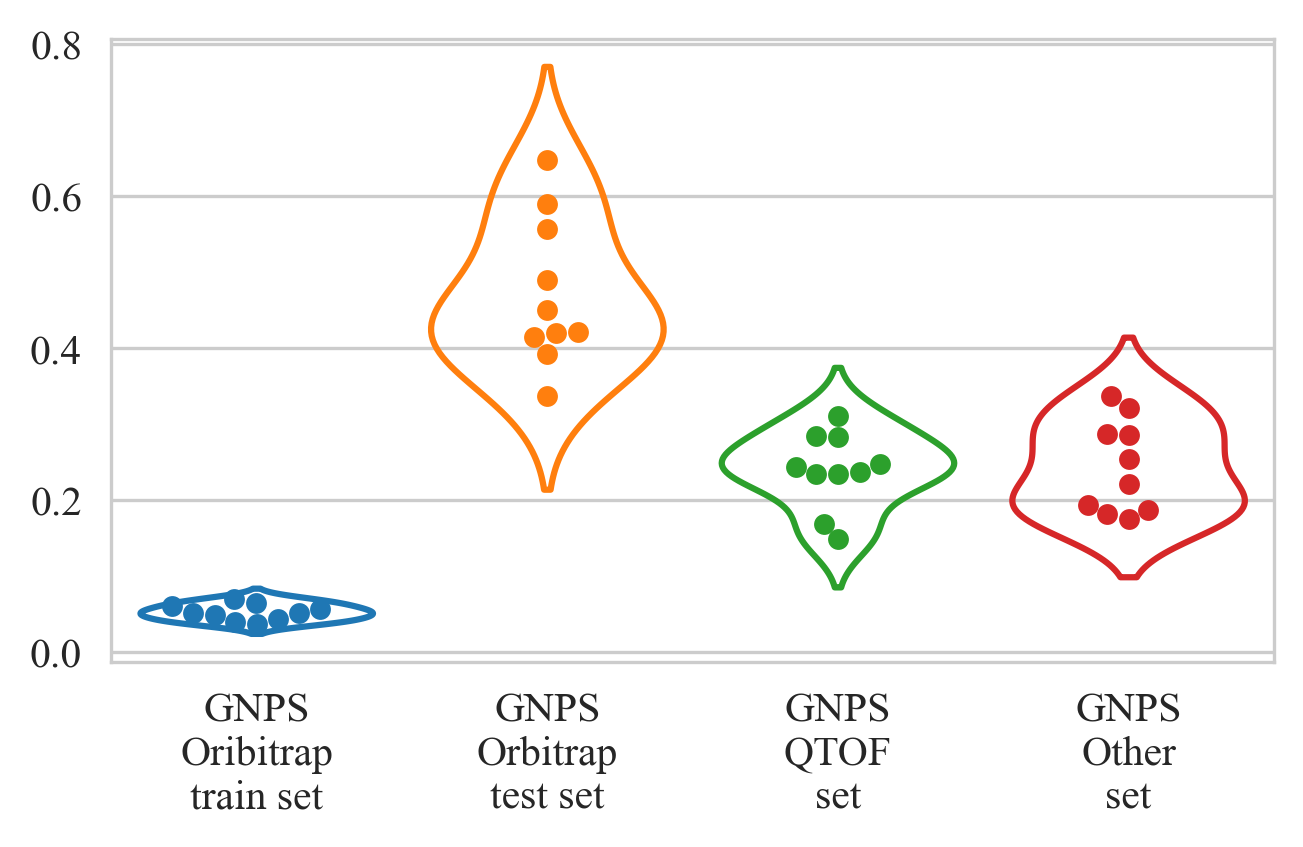

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

dir_ = Path("./replication_models")
labels = None
values = []

for path in dir_.glob("*"):
    df = pd.read_csv(path / "std.tsv", sep="\t", index_col=0)
    if labels is None:
        labels = df.index
    values.append(df.values[:, 0])
values = np.array(values)
values = values.T

figure, ax = plt.subplots(1, 1, dpi=300, figsize=(5, 2.7), sharex=True)
axs: list[Axes]
colors = sns.color_palette("tab10")

sns.violinplot(y=values[0], x=0, fill=False, ax=ax, color=colors[0], inner=None)
sns.violinplot(y=values[1], x=1, fill=False, ax=ax, color=colors[1], inner=None)
sns.violinplot(y=values[2], x=2, fill=False, ax=ax, color=colors[2], inner=None)
sns.violinplot(y=values[3], x=3, fill=False, ax=ax, color=colors[3], inner=None)

sns.swarmplot(y=values[0], x=0, ax=ax, color=colors[0])
sns.swarmplot(y=values[1], x=1, ax=ax, color=colors[1])
sns.swarmplot(y=values[2], x=2, ax=ax, color=colors[2])
sns.swarmplot(y=values[3], x=3, ax=ax, color=colors[3])
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([
    "GNPS\nOribitrap\ntrain set", 
    "GNPS\nOrbitrap\ntest set",
    "GNPS\nQTOF\nset",
    "GNPS\nOther\nset"
])

figure.savefig("./figures/replication-std.svg", transparent=True, bbox_inches="tight")
figure.savefig("./figures/replication-std.pdf", transparent=True, bbox_inches="tight")
figure.savefig("./figures/replication-std.png", transparent=True, bbox_inches="tight")